Prediksi Kualitas Udara Tahun 2004-2005 di Kota Italia dengan Multiple Linear Regression

---

Link dataset: https://archive.ics.uci.edu/dataset/360/air+quality


Mengimpor Data dan Library yang Dibutuhkan:

In [ ]:
#untuk import data dan pengolahannya
import pandas as pd
import numpy as np

#untuk grafik
import seaborn as sns
import matplotlib.pyplot as plt

#untuk menggunakan metode mlr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#untuk import data langsung dari webnya
import requests
import zipfile
import io

Menetapkan Nama Kolom:

In [ ]:
# URL dari dataset Air Quality UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# Mengunduh file zip
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

# Menampilkan daftar file dalam zip
print(z.namelist())

# Membaca file Excel dari zip (sesuaikan dengan nama file yang benar dalam zip)
columns = ["Date", "Time", "CO", "PT08.S1", "NMHC", "Benzene", "PT08.S2", "NOx",
           "PT08.S3", "NO2", "PT08.S4", "PT08.S5", "Temperature", "RH", "AH"]
df = pd.read_excel(z.open('AirQualityUCI.xlsx'), names=columns)
df_old = df

# Menampilkan 5 baris pertama dari dataset
print(df.head())

['AirQualityUCI.csv', 'AirQualityUCI.xlsx']
        Date      Time   CO  PT08.S1  NMHC    Benzene  PT08.S2    NOx  \
0 2004-03-10  18:00:00  2.6  1360.00   150  11.881723  1045.50  166.0   
1 2004-03-10  19:00:00  2.0  1292.25   112   9.397165   954.75  103.0   
2 2004-03-10  20:00:00  2.2  1402.00    88   8.997817   939.25  131.0   
3 2004-03-10  21:00:00  2.2  1375.50    80   9.228796   948.25  172.0   
4 2004-03-10  22:00:00  1.6  1272.25    51   6.518224   835.50  131.0   

   PT08.S3    NO2  PT08.S4  PT08.S5  Temperature         RH        AH  
0  1056.25  113.0  1692.00  1267.50        13.60  48.875001  0.757754  
1  1173.75   92.0  1558.75   972.25        13.30  47.700000  0.725487  
2  1140.00  114.0  1554.50  1074.00        11.90  53.975000  0.750239  
3  1092.00  122.0  1583.75  1203.25        11.00  60.000000  0.786713  
4  1205.00  116.0  1490.00  1110.00        11.15  59.575001  0.788794  


# Feature Engineering (Hour, DayOfWeek, Month):

In [ ]:
# Konversi kolom Date dan Time menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Menggabungkan kolom Date dan Time menjadi satu kolom datetime
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Menghapus kolom Date dan Time
df = df.drop(['Date', 'Time'], axis=1)

# Menjadikan 'Datetime' sebagai index
df.set_index('Datetime', inplace=True)

# Menambahkan fitur tambahan dari datetime
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df_old2 = df

# Menangani Missing Values

Mengganti Missing Values (-200) dengan NaN:

In [ ]:
# Mengganti nilai -200 dengan NaN
df.replace(-200, np.nan, inplace=True)

Memeriksa Missing Values:

In [ ]:
# Menampilkan informasi umum tentang DataFrame
print("Informasi DataFrame:")
print(df.info())

# Jumlah missing values di setiap kolom
print("\nJumlah missing values di setiap kolom:")
print(df.isnull().sum())

# Menampilkan baris yang memiliki missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nBaris yang memiliki missing values:")
print(missing_rows)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO           7674 non-null   float64
 1   PT08.S1      8991 non-null   float64
 2   NMHC         914 non-null    float64
 3   Benzene      8991 non-null   float64
 4   PT08.S2      8991 non-null   float64
 5   NOx          7718 non-null   float64
 6   PT08.S3      8991 non-null   float64
 7   NO2          7715 non-null   float64
 8   PT08.S4      8991 non-null   float64
 9   PT08.S5      8991 non-null   float64
 10  Temperature  8991 non-null   float64
 11  RH           8991 non-null   float64
 12  AH           8991 non-null   float64
 13  Hour         9357 non-null   int32  
 14  DayOfWeek    9357 non-null   int32  
 15  Month        9357 non-null   int32  
dtypes: float64(13), int32(3)
memory usage: 1.1 MB
None

Jumlah missing values d

Mengisi Missing Values dengan Nilai Lain:

In [ ]:
# Mengisi missing values dengan nilai rata-rata dari setiap kolom
df_filled = df.fillna(df.mean())
print("\nDataFrame setelah mengisi missing values dengan nilai rata-rata:")
print(df_filled.info())
df = df_filled


DataFrame setelah mengisi missing values dengan nilai rata-rata:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO           9357 non-null   float64
 1   PT08.S1      9357 non-null   float64
 2   NMHC         9357 non-null   float64
 3   Benzene      9357 non-null   float64
 4   PT08.S2      9357 non-null   float64
 5   NOx          9357 non-null   float64
 6   PT08.S3      9357 non-null   float64
 7   NO2          9357 non-null   float64
 8   PT08.S4      9357 non-null   float64
 9   PT08.S5      9357 non-null   float64
 10  Temperature  9357 non-null   float64
 11  RH           9357 non-null   float64
 12  AH           9357 non-null   float64
 13  Hour         9357 non-null   int32  
 14  DayOfWeek    9357 non-null   int32  
 15  Month        9357 non-null   int32  
dtypes: float64(13), int32(3)
memor

In [ ]:
df

,CO,PT08.S1,NMHC,Benzene,PT08.S2,NOx,PT08.S3,NO2,PT08.S4,PT08.S5,Temperature,RH,AH,Hour,DayOfWeek,Month
Datetime,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,2,3
2004-03-10 19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,2,3
2004-03-10 20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,2,3
2004-03-10 21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,2,3
2004-03-10 22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,0,4
2005-04-04 11:00:00,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,0,4
2005-04-04 12:00:00,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,0,4


# Exploratory Data Analysis (EDA):

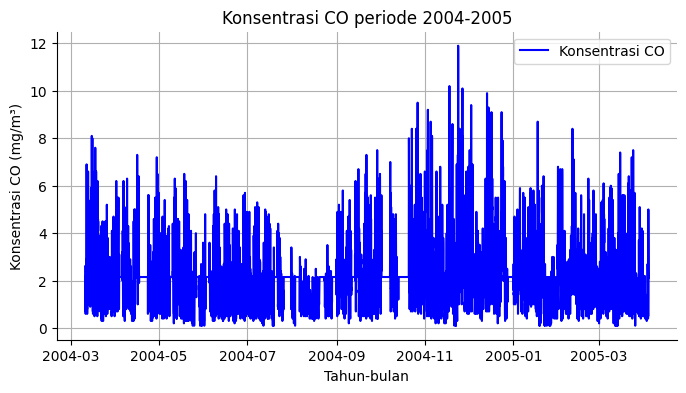

In [ ]:
from matplotlib import pyplot as plt

# Membuat plot garis untuk data CO menggunakan index datetime
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['CO'], label='Konsentrasi CO', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Konsentrasi CO periode 2004-2005')
plt.xlabel('Tahun-bulan')
plt.ylabel('Konsentrasi CO (mg/m³)')

# Menambahkan grid dan legenda
plt.grid(True)
plt.legend()

# Menampilkan plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Sebelum missing data ditangani:

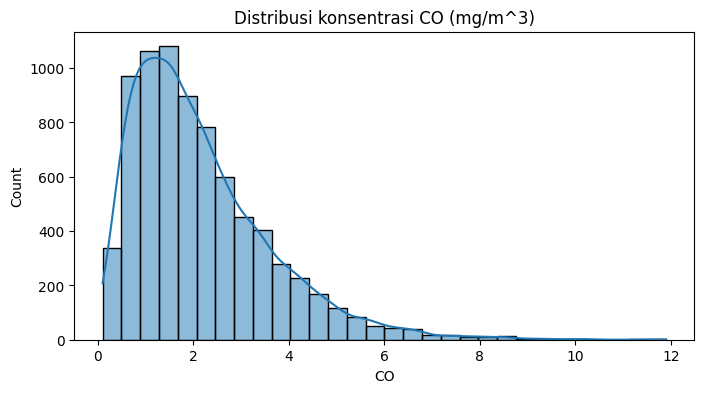

In [ ]:
# Distribusi harga CO (variabel target)
plt.figure(figsize=(8, 4))
sns.histplot(df_old2['CO'], bins=30, kde=True)
plt.title('Distribusi konsentrasi CO (mg/m^3)')
plt.show()

Sesudah missing data ditangani:

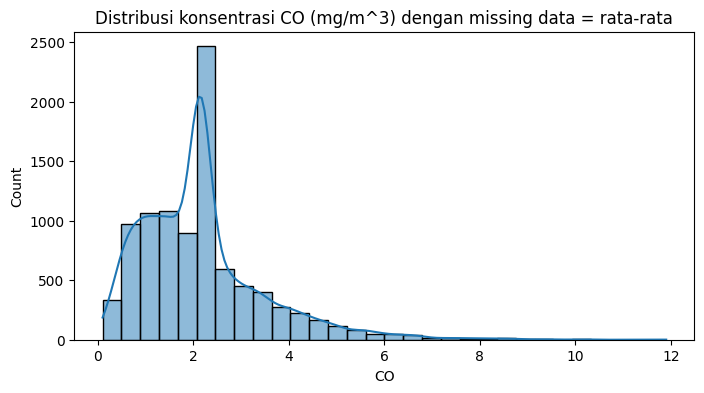

In [ ]:
# Distribusi harga CO (variabel target)
plt.figure(figsize=(8, 4))
sns.histplot(df['CO'], bins=30, kde=True)
plt.title('Distribusi konsentrasi CO (mg/m^3) dengan missing data = rata-rata')
plt.show()

# Regresi Linier Berganda (Multiple Linear Regression):

In [ ]:
# y = variabel dependen
y = df["CO"]
# X = variabel independen
X = df.drop(["CO"], axis=1)

In [ ]:
y

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO, Length: 9357, dtype: float64

In [ ]:
X

,PT08.S1,NMHC,Benzene,PT08.S2,NOx,PT08.S3,NO2,PT08.S4,PT08.S5,Temperature,RH,AH,Hour,DayOfWeek,Month
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,2,3
2004-03-10 19:00:00,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,2,3
2004-03-10 20:00:00,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,2,3
2004-03-10 21:00:00,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,2,3
2004-03-10 22:00:00,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,0,4
2005-04-04 11:00:00,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,0,4
2005-04-04 12:00:00,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,0,4


# Prediksi 20% Data

In [ ]:
# Untuk 200 data (1000 x 0.2 = 200 di test_size-0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predict = linear_model.predict(X_test)
pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
PT08.S1,0.000870
NMHC,0.001876
Benzene,0.078536
PT08.S2,-0.002163
NOx,0.003256
PT08.S3,0.000124
NO2,0.002964
PT08.S4,0.001841
PT08.S5,-0.000170
Temperature,-0.014318


In [ ]:
y_predict

array([2.69115706, 2.1127084 , 1.64724246, ..., 0.77602779, 1.69857337,
       2.07714306])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.3722476488955637
MSE: 0.2975468780828196
RMSE: 0.5454785771071304


Membuat Data Prediksi CO

In [ ]:
new = pd.DataFrame(y_predict, columns=['prediksi'])
new

,prediksi
0,2.691157
1,2.112708
2,1.647242
3,1.600140
4,2.173763
...,...
1867,2.245548
1868,2.514300
1869,0.776028
1870,1.698573


# Prediksi Seluruh Data

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X,y)
y_predictnew = linear_model.predict(X)
pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
PT08.S1,0.000891
NMHC,0.001897
Benzene,0.077027
PT08.S2,-0.002133
NOx,0.003251
PT08.S3,0.000082
NO2,0.003135
PT08.S4,0.001854
PT08.S5,-0.000203
Temperature,-0.015683


In [ ]:
print('MAE:', metrics.mean_absolute_error(y, y_predictnew))
print('MSE:', metrics.mean_squared_error(y, y_predictnew))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_predictnew)))
MAE_forPercent = metrics.mean_absolute_error(y, y_predictnew)

MAE: 0.39037513852379724
MSE: 0.32727268517916325
RMSE: 0.5720775167572689


In [ ]:
new_all = pd.DataFrame(y_predictnew, columns=['prediksi'])
new_all

,prediksi
0,2.492717
1,1.951649
2,2.129196
3,2.254324
4,1.853799
...,...
9352,2.979872
9353,2.331267
9354,2.128352
9355,1.524014


In [ ]:
print(len(df))        # Panjang DataFrame df
print(len(new_all))   # Panjang DataFrame new_all

9357
9357


In [ ]:
df_reset = df.reset_index(drop=True)
new_all_reset = new_all.reset_index(drop=True)

In [ ]:
prediksi_semua = pd.concat([df_reset, new_all_reset], axis=1)
prediksi_semua.index = df_old2.index
print(prediksi_semua)

                      CO  PT08.S1        NMHC    Benzene  PT08.S2    NOx  \
Datetime                                                                   
2004-03-10 18:00:00  2.6  1360.00  150.000000  11.881723  1045.50  166.0   
2004-03-10 19:00:00  2.0  1292.25  112.000000   9.397165   954.75  103.0   
2004-03-10 20:00:00  2.2  1402.00   88.000000   8.997817   939.25  131.0   
2004-03-10 21:00:00  2.2  1375.50   80.000000   9.228796   948.25  172.0   
2004-03-10 22:00:00  1.6  1272.25   51.000000   6.518224   835.50  131.0   
...                  ...      ...         ...        ...      ...    ...   
2005-04-04 10:00:00  3.1  1314.25  218.811816  13.529605  1101.25  471.7   
2005-04-04 11:00:00  2.4  1162.50  218.811816  11.355157  1027.00  353.3   
2005-04-04 12:00:00  2.4  1142.00  218.811816  12.374538  1062.50  293.0   
2005-04-04 13:00:00  2.1  1002.50  218.811816   9.547187   960.50  234.5   
2005-04-04 14:00:00  2.2  1070.75  218.811816  11.932060  1047.25  265.2   

           

In [ ]:
prediksi_semua

,CO,PT08.S1,NMHC,Benzene,PT08.S2,NOx,PT08.S3,NO2,PT08.S4,PT08.S5,Temperature,RH,AH,Hour,DayOfWeek,Month,prediksi
Datetime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,2,3,2.492717
2004-03-10 19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,2,3,1.951649
2004-03-10 20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,2,3,2.129196
2004-03-10 21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,2,3,2.254324
2004-03-10 22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,2,3,1.853799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,0,4,2.979872
2005-04-04 11:00:00,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,0,4,2.331267
2005-04-04 12:00:00,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,0,4,2.128352


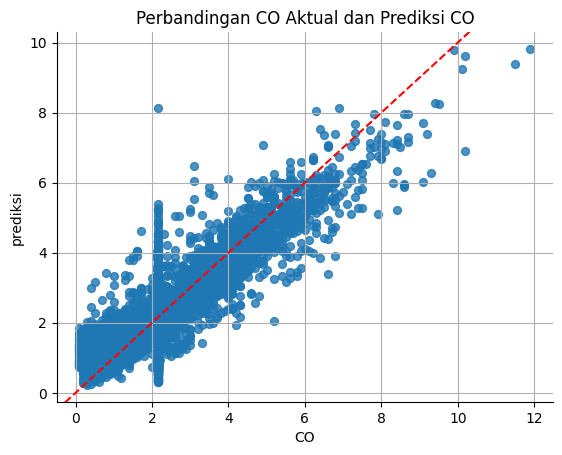

In [ ]:
# Plot scatter plot
ax = prediksi_semua.plot(kind='scatter', x='CO', y='prediksi', s=32, alpha=.8)

# Get the current limits of the plot
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Determine the min and max range for the line
line_start = min(xlim[0], ylim[0])
line_end = max(xlim[1], ylim[1])

# Plot the y=x line
ax.plot([line_start, line_end], [line_start, line_end], color='red', linestyle='--')

# Set the limits back to what they were
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Hide the top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Add title to the plot
plt.title('Perbandingan CO Aktual dan Prediksi CO')

# Grid
plt.grid(True)

plt.show()

Export csv tanpa index (datetime):

In [ ]:
# Menggunakan nama file 'prediksi_semua.csv', sesuaikan dengan nama yang di inginkan
file_path_prediksi_semua_csv = 'prediksi_semua.csv'

# Menyimpan DataFrame ke file CSV
prediksi_semua.to_csv(file_path_prediksi_semua_csv, index=False)

print(f'DataFrame "prediksi_semua" berhasil diekspor ke: {file_path_prediksi_semua_csv}')

DataFrame "prediksi_semua" berhasil diekspor ke: prediksi_semua.csv


Export csv & excel dengan index (datetime):

In [ ]:
# Menggunakan nama file 'prediksi_semua.csv', sesuaikan dengan nama yang di inginkan
file_path_prediksi_semua_index_csv = 'prediksi_semua_index.csv'

# Menyimpan DataFrame ke file CSV
prediksi_semua.to_csv(file_path_prediksi_semua_index_csv, index=True)

print(f'DataFrame "prediksi_semua_index" berhasil diekspor ke: {file_path_prediksi_semua_index_csv}')

# Menggunakan nama file 'prediksi_semua.xlsx', sesuaikan dengan nama yang diinginkan
file_path_prediksi_semua_index_xlsx = 'prediksi_semua_index.xlsx'

# Menyimpan DataFrame ke file XLSX
prediksi_semua.to_excel(file_path_prediksi_semua_index_xlsx, index=True)

print(f'DataFrame "prediksi_semua_index" berhasil diekspor ke: {file_path_prediksi_semua_index_xlsx}')

DataFrame "prediksi_semua_index" berhasil diekspor ke: prediksi_semua_index.csv
DataFrame "prediksi_semua_index" berhasil diekspor ke: prediksi_semua_index.xlsx


Menghitung nilai persen MAE:

In [ ]:
# Misalkan variabel dependent Anda bernama 'CO'
rata_rata_CO = df['CO'].mean()

# Menampilkan hasil
print(f"Rata-rata CO: {rata_rata_CO}")

Rata-rata CO: 2.1527495439145166


In [ ]:
# Menghitung MAE sebagai persentase dari rata-rata variabel dependent
MAE_percentage = (MAE_forPercent / rata_rata_CO) * 100

# Menampilkan hasil
print(f"Mean Absolute Error (MAE) sebagai persentase dari rata-rata variabel dependent: {MAE_percentage:.2f}%")

# Menentukan kategori akurasi
if MAE_percentage < 10:
    print("Nilai < 10% = Peramalan Sangat Akurat")
elif 10 <= MAE_percentage < 20:
    print("Nilai 10% - 20% = Peramalan Akurat")
elif 20 <= MAE_percentage < 50:
    print("Nilai 20% - 50% = Peramalan Cukup Akurat")
else:

    print("Nilai > 50% = Peramalan Tidak Akurat")

Mean Absolute Error (MAE) sebagai persentase dari rata-rata variabel dependent: 18.13%
Nilai 10% - 20% = Peramalan Akurat
